Import Packages

In [1]:
# feel free to add more
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Read Data

In [2]:
df = pd.read_csv('C:/Data/garments_worker_productivity.csv')

In [3]:
# Check which variable contains missing values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [4]:
# Since about 50% of the observations in wip are missing, we may consider delete this variable, but feel free to use other treatments.
df = df.drop(['wip'], axis = 1)
# Since workday and quarter area already captured in different features, we can probably delete date
df = df.drop(['date'], axis = 1)
# The variable idle_men seems to contain little information that is not already captured by idle time
df = df.drop(['idle_men'], axis = 1)
# Idle time is mostly 0 - thus dichotomizing it makes sense
df['idle_time'] = df['idle_time'].apply(lambda x: 1 if x > 0 else x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 112.3+ KB


In [7]:
#I made team a category (even though its a number), same with targets and changes
cat_cols = ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'no_of_style_change']
num_cols = ['smv', 'over_time', 'incentive', 'no_of_workers']
#One hot encoding, dropping the first category
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#Standardizing all features (not the labels)
scaler= StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

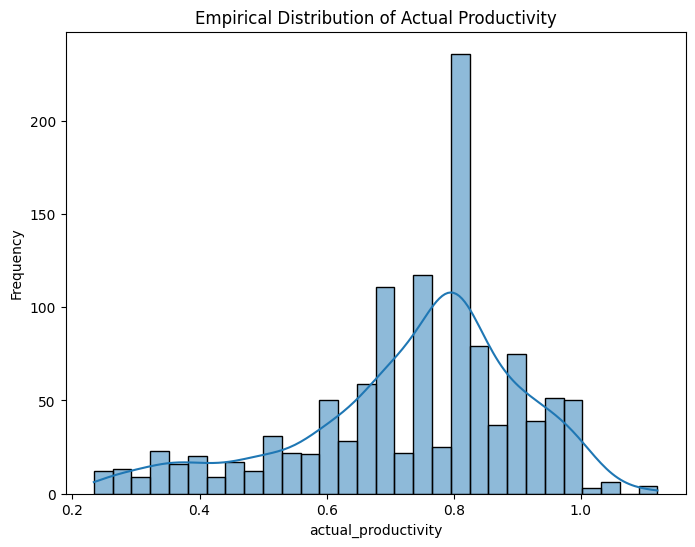

In [8]:
# What is our dependent variable/label?
response_variable = df['actual_productivity']

# Plot the empirical distribution
plt.figure(figsize = (8, 6))
sns.histplot(response_variable, kde = True, bins = 30)  # kde = True plots the kernel density estimate
plt.title('Empirical Distribution of Actual Productivity')
plt.xlabel('actual_productivity')
plt.ylabel('Frequency')
plt.show()

Assuming we are doing a regressing task for now, can you try identify any features thay may contribute to an employee's actual productivity?

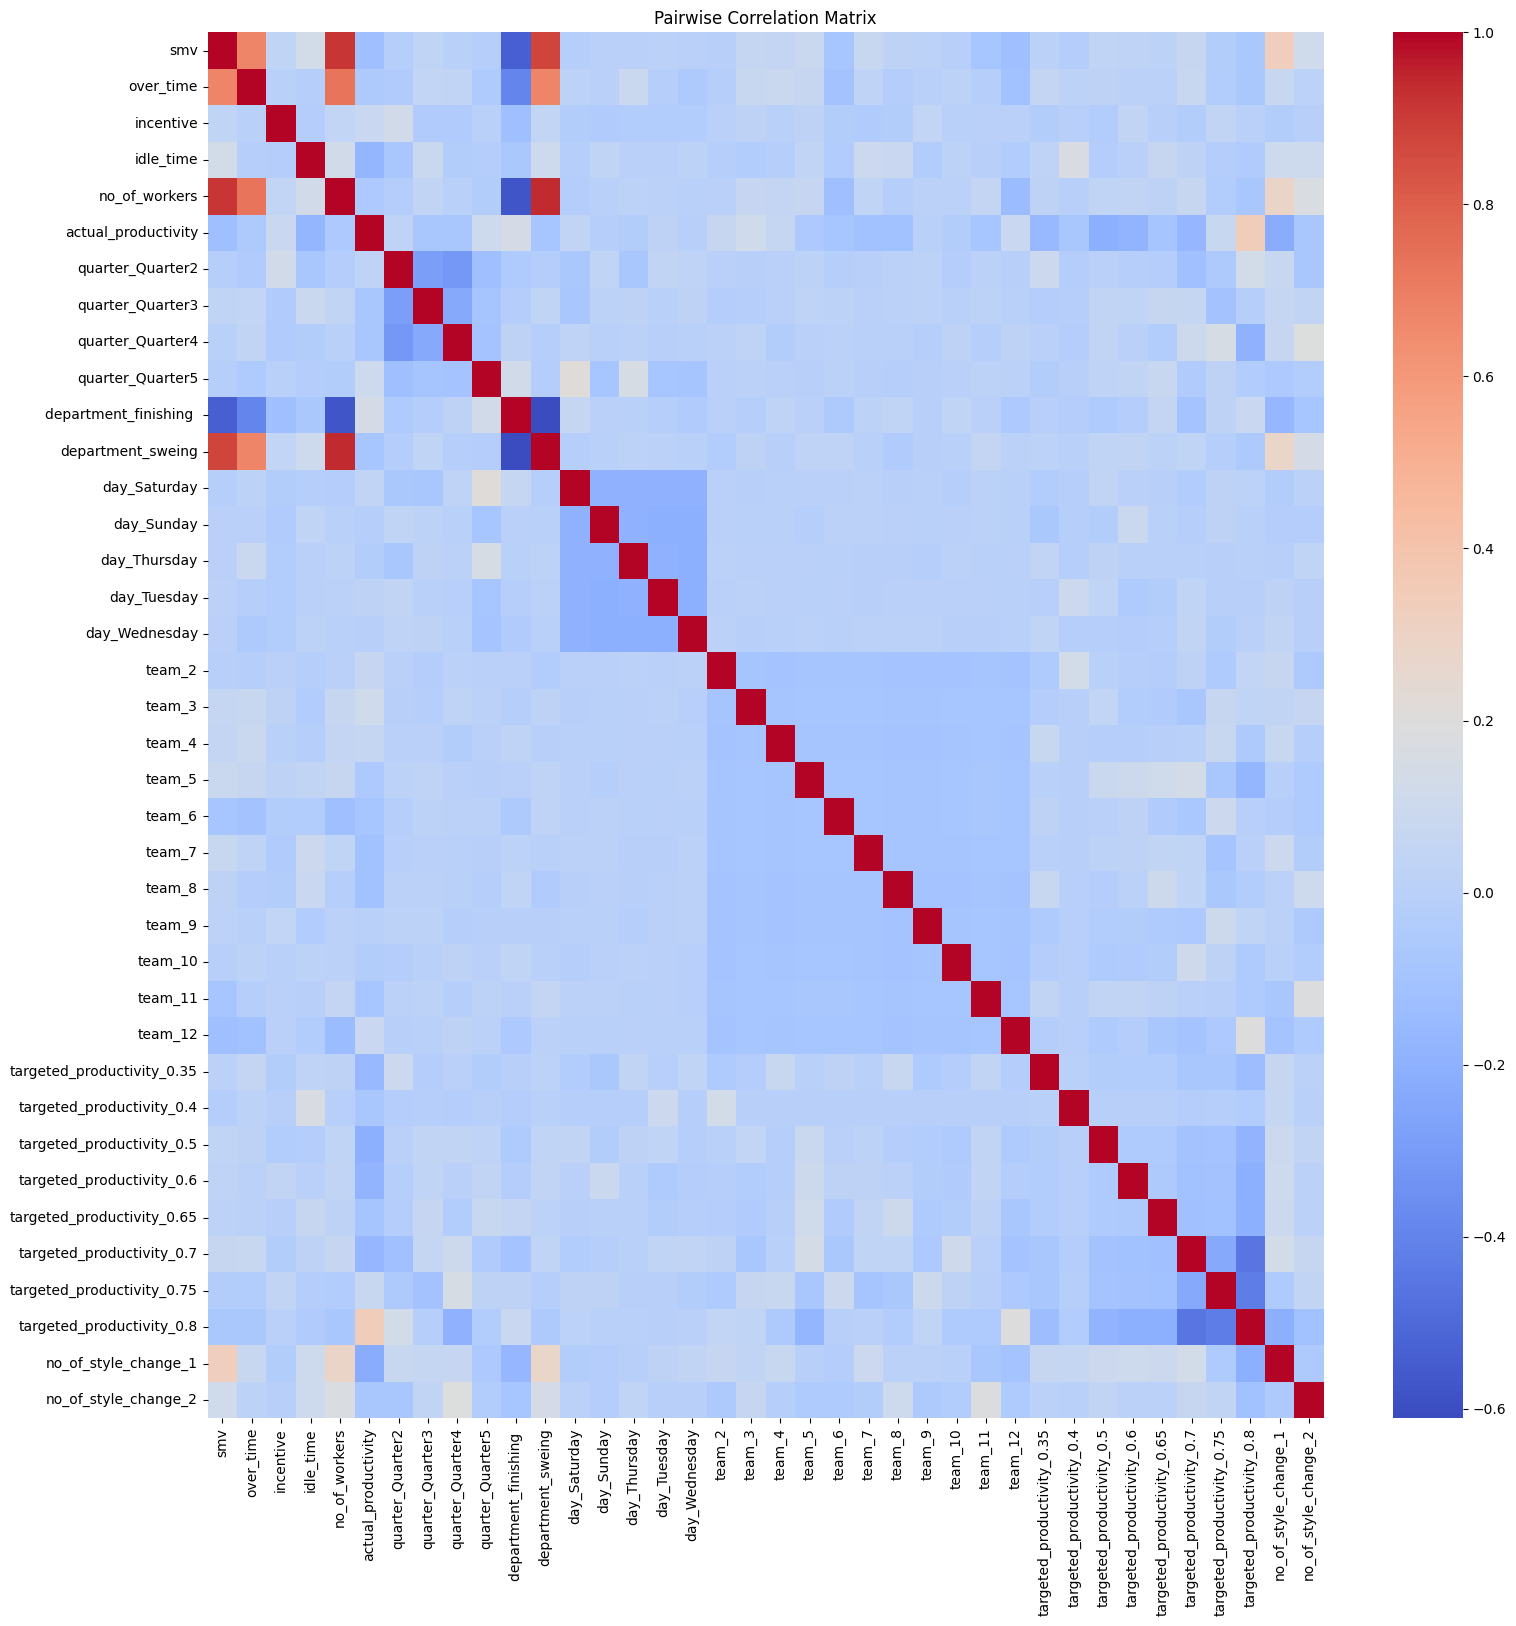

In [9]:
# A grid plot for pairwise correlation may be helpful 

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize = (18, 18))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=False)
plt.title('Pairwise Correlation Matrix')
plt.show()

# What features are highly correlated to the response?
# what another important signal you see from the correlation matrix?